In [ ]:
!pip install --quiet torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.9 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np

from torchviz import make_dot # for Computional Graph
from IPython.display import display, Math, Latex # for display

for c in [torch, np]:
  print(c.__version__)

2.6.0+cu124
2.0.2


# Linear Regression

$$y = \textbf{w}^T \textbf{x} + b$$

* 엄밀하게 애기하면 affine transform (not linear transform)

## Fahrenheit vs. Celsius

from Fahrenheit (`x`) to Celsius (`y`)

$$ y = 1.8 \times x + 32 $$

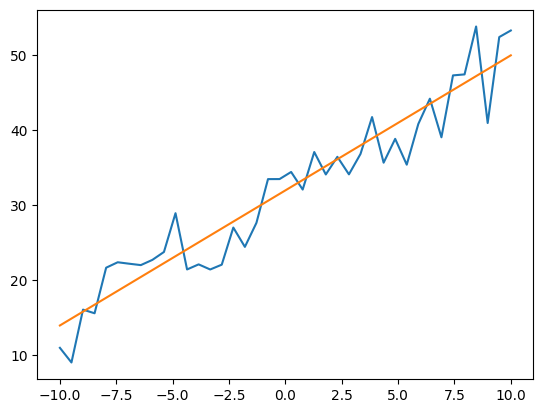

In [ ]:
x = np.linspace(-10,10, 40)
y_ideal = 1.8 * x + 32.
y = y_ideal + 4.*np.random.randn((40))

import matplotlib.pyplot as plt
plt.plot(x,y, x,y_ideal)

In [ ]:
y = torch.tensor(y).float()
x = torch.tensor(x).float()

print(y.dtype, y.shape)
print(x.dtype, x.shape)

torch.float32 torch.Size([40])
torch.float32 torch.Size([40])


## Model and Loss Func. 만들기.

Custom function으로

* linear 모델과
* loss function을 생성.

In [ ]:
def ds_linear_model (x, w, b):
  # ret_v = w * x + b
  # return ret_v
  return w * x + b

In [ ]:
def loss_fnc (pred, label):
  mse = ((pred - label)**2).mean()
  return mse

### init model's parameters

linear model에서는 기울기와 절편만을 파라메터로 가짐.

* `w`
* `b`

이를 1과 0으로 초기화

In [ ]:
w = torch.ones(())  # 빈 튜플을 통해 scalar 에 해당하는 tensor 생성.
b = torch.zeros(())

In [ ]:
w.shape,b.shape

(torch.Size([]), torch.Size([]))

In [ ]:
w,b

(tensor(1.), tensor(0.))

### 모델 Test: Prediction

현재의 초기화된 linear모델로 예측(or inference)를 수행해봐서 정상동작하는지를 살펴봄.

In [ ]:
pred = ds_linear_model(x, w, b)
pred

tensor([-10.0000,  -9.4872,  -8.9744,  -8.4615,  -7.9487,  -7.4359,  -6.9231,
         -6.4103,  -5.8974,  -5.3846,  -4.8718,  -4.3590,  -3.8462,  -3.3333,
         -2.8205,  -2.3077,  -1.7949,  -1.2821,  -0.7692,  -0.2564,   0.2564,
          0.7692,   1.2821,   1.7949,   2.3077,   2.8205,   3.3333,   3.8462,
          4.3590,   4.8718,   5.3846,   5.8974,   6.4103,   6.9231,   7.4359,
          7.9487,   8.4615,   8.9744,   9.4872,  10.0000])

### Loss Func. Test

loss function이 제대로 동작하는지 확인하기 위해,  
1의 차이가 나는 pred와 label을 테스트용으로 만들어 입력하고 이를 확인함.

In [ ]:
l = loss_fnc(pred+1,pred)
l

tensor(1.)

## PyTorch의 loss function 기능.

* `nn.MSELoss`는 클래스로 다음으로 instance를 생성.  
  * `mse_loss_fn = nn.MSELoss()` 로 object를 생성해야 함.
* 생성된 객체는 `__call__()` 메서드 덕분에 함수처럼 사용 가능 (callable).
* PyTorch에서는 대부분의 손실 함수가 이런 식으로 설계되어 있음 (`nn.CrossEntropyLoss`, `nn.L1Loss` 등도 동일한 구조).

In [ ]:
import torch
import torch.nn as nn

# 예측값과 실제값 정의
pred = torch.tensor([2.0, 3.0, 4.0], requires_grad=True)
target = torch.tensor([1.0, 2.0, 3.0])

# nn.MSELoss 인스턴스 생성
mse_loss_fn = nn.MSELoss()

# 타입 출력
print(f"타입: {type(mse_loss_fn)}")  # <class 'torch.nn.modules.loss.MSELoss'>
print("nn.MSELoss는 클래스이며, 생성된 객체는 함수처럼 호출 가능합니다.\n")

# 1. nn.MSELoss 사용
loss_nn = mse_loss_fn(pred, target)

# 2. 직접 구현한 MSE Loss
loss_custom = ((pred - target) ** 2).mean()

# 결과 비교 출력
print(f"nn.MSELoss 결과:       {loss_nn.item():.4f}")
print(f"직접 구현한 MSE 결과: {loss_custom.item():.4f}")

# gradient 비교
# 먼저 nn.MSELoss 결과에 대해 backward 수행
# retain_graph=True는 같은 computational graph를 유지하여 두 번째 backward도 가능하게 함
# (그래프가 기본적으로는 backward 후 사라지므로 두 번 이상 사용할 땐 꼭 필요함)
pred.grad = None
loss_nn.backward(retain_graph=True)
grad_nn = pred.grad.clone()

# 다음, 직접 구현한 손실에 대해 backward
pred.grad = None
loss_custom.backward()
grad_custom = pred.grad.clone()

# 결과 출력
print(f"\nnn.MSELoss의 gradient: {grad_nn}")
print(f"직접 구현한 gradient:   {grad_custom}")
print(f"\n두 gradient가 동일한가? {torch.allclose(grad_nn, grad_custom)}")

## Gradient Descent Algorithm

Numerical method로

`w,b`에 대한 gradient를 계산






### weights

$$ w_{t+1} = w_{t} - \eta \nabla_{w} L(w_t, X, Y)$$

$$\begin{align}\nabla_{w} L(w_t, X, Y) &= \frac{ \partial L(w_t, X, Y)}{
  \partial w} \\ &\approx \frac{L(w_t + \delta, X, Y) - L(w_t - \delta, X, Y)}{2\delta} \end{align}$$

In [ ]:
delta = 0.1
lr = 1e-3 # 0.001

d_loss_d_w = (loss_fnc(ds_linear_model(x, w+delta, b), y) - loss_fnc(ds_linear_model(x, w-delta, b), y)) / (2. * delta)

tmp = d_loss_d_w.detach().numpy()
print(tmp)
display( Math(r'\frac{ \partial L(w_t, X, Y)}{\partial w} \approx'+ str(tmp)))

-55.93506


<IPython.core.display.Math object>

### bais

$$ b_{t+1} = b_{t} - \eta \nabla_{b} L(b_t, X, Y)$$

$$\begin{align}\nabla_{b} L(b_t, X, Y) &= \frac{ \partial L(b_t, X, Y)}{
  \partial b} \\ &\approx \frac{L(b_t + \delta, X, Y) - L(b_t - \delta, X, Y)}{2\delta} \end{align}$$

In [ ]:
d_loss_d_b = (loss_fnc(ds_linear_model(x, w, b+delta), y) - loss_fnc(ds_linear_model(x, w, b-delta), y)) / (2. * delta)

tmp = d_loss_d_b.detach().numpy()
print(tmp)
display( Math(r'\frac{ \partial L(b_t, X, Y)}{\partial b} \approx'+ str(tmp)))

-63.28369


<IPython.core.display.Math object>

### update parameters

In [ ]:
w = w - lr * d_loss_d_w
b = b - lr * d_loss_d_b

w,b

(tensor(1.0559), tensor(0.0633))

In [ ]:
print(f'current loss: {l=}')
pred = ds_linear_model(x,w,b)
l_new = loss_fnc(pred, y)
print(f'new loss: {l_new=}')

current loss: l=tensor(1.)
new loss: l_new=tensor(1027.9822)


---

# Analytical Derivatives

앞서 구한 numerical method 대신에,  

MSE에 대한 gradient를 계산

$$ \begin{aligned}L &= (\hat{y} - y)^2 \\&= (wx+b -y)^2  \\ \hat{y}&=wx+b\end{aligned}$$

이 loss func. 를 parameters `w`, `b`에 대해 partial derivative를 다음과 같이 구할 수 있음.


$$ \begin{aligned}\frac{\partial L}{\partial w} &= \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w}\\  \frac{\partial L}{\partial b} &= \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial b}\end{aligned}$$

chain rule에 의해 구하기 위한 내용은 다음과 같음.

$$\begin{aligned}
\frac{\partial L}{\partial \hat{y}} &= 2(\hat{y}-y) \\\\  
 \frac{\partial \hat{y}}{\partial w} &= x \\\\ \frac{\partial \hat{y}}{\partial b} &= 1  
\end{aligned}\$$

In [ ]:
def anal_d_loss_d_pred(pred,y):
  ret_v = 2. *(pred-y)
  return ret_v

def anal_d_pred_d_w(x, w, b):
  return x

def anal_d_pred_d_b(x, w, b):
  return 1.

위로부터 구해진 gradient는 다음과 같음.
$$
\nabla L = \begin{bmatrix} \frac{dL}{dw} \\
\frac{dL}{db} \end{bmatrix}$$

In [ ]:
def get_grad(x, y, pred, w, b):
  v_d_loss_d_pred = anal_d_loss_d_pred(pred, y)
  v_d_loss_d_w = v_d_loss_d_pred * anal_d_pred_d_w(x,w,b)
  v_d_loss_d_b = v_d_loss_d_pred * anal_d_pred_d_b(x,w,b)

  return torch.stack([v_d_loss_d_w.mean(), v_d_loss_d_b.mean()])

이를 기반으로, 초기값의 파라메터에 대한 linear model로부터 loss 를 구하고 이에 대한 gradient를 구하는 과정을 테스트하면 다음과 같음.

In [ ]:

w_init = 1.
b_init = 0.

preds = ds_linear_model(x, w_init, b_init)
l = loss_fnc(preds, y)
grad = get_grad(x, y, preds, w_init, b_init)

display(f'{grad=}')


'grad=tensor([-55.9347, -63.2832])'

# Training

앞서 구한 내용들을 바탕으로 training을 구현하면 아래와 같음.

In [ ]:
def ds_training (x, y, model, _w, _b, n_epoch, lr, log_flag = False):

  w, b = _w, _b

  for epoch in range(n_epoch):

    pred = model(x,w,b)
    l = loss_fnc(pred, y)

    if torch.isinf(l).any():
      print('Error: loss is infinity.')
      print(f'{epoch=}')
      break

    grad = get_grad(x,y,pred,w,b)
    w = w - lr* grad[0]
    b = b - lr* grad[1]

    if epoch in [0,1,2,3,4,5, 100, 1000, 2000, 3000, 4000, 5000]:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')
      if log_flag:
        print(f'{w=}, {b=}')
    elif epoch in [6,101,1001,2001,3001,4001,5001]:
      print('---')

  return w, b



In [ ]:
w_n, b_n = ds_training(
    x, y, ds_linear_model,
    torch.ones(()),
    torch.zeros(()),
    7000,
    lr = 1e-3,
)
w_n, b_n

Epoch 0: Loss 1035.0022
Epoch 1: Loss 1027.9822
Epoch 2: Loss 1021.3869
Epoch 3: Loss 1015.1605
Epoch 4: Loss 1009.2552
Epoch 5: Loss 1003.6299
---
Epoch 100: Loss 682.3402
---
Epoch 1000: Loss 29.7548
---
Epoch 2000: Loss 11.8238
---
Epoch 3000: Loss 11.4967
---
Epoch 4000: Loss 11.4907
---
Epoch 5000: Loss 11.4906
---


(tensor(1.7981), tensor(31.6411))

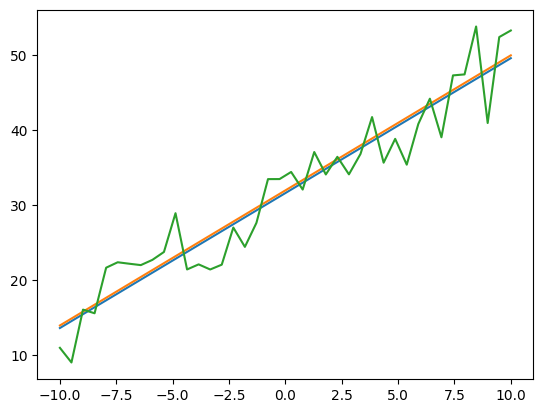

In [ ]:
pred = ds_linear_model(x, w_n, b_n)

plt.plot(x, pred, x, y_ideal, x, y)

# Torch's AutoGrad


앞서 analytical method로 직접 gradient를 구하기 위한 partial derivatives를 구현한 방식이 아닌,  
PyTorch의 AutoGrad를 이용한 구현은 다음과 같음.

In [ ]:
params = torch.tensor(
    [1., 0.],
    requires_grad = True
)

if params.grad is None:
  print('"grad" attributes \'s default is None.')

"grad" attributes 's default is None.


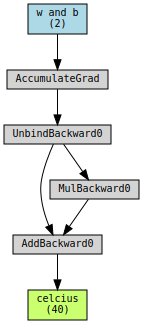

In [ ]:
pred = ds_linear_model(x, *params)
cg = make_dot(pred, params = {'w and b': params, 'celcius': pred })
display(cg)

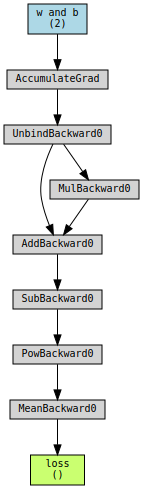

In [ ]:
l = loss_fnc(pred, y)
cg = make_dot(l, params={'loss': l, 'w and b': params})
display(cg)

In [ ]:
l.backward()
params.grad

tensor([-55.9347, -63.2832])

 한번의 업데이트 이후 grad를 inplace 연산을 통해 0으로 초기화하는 과정은 다음과 같음.

In [ ]:
if params.grad is not None:
  params.grad.zero_()
  params.grad

In [ ]:
def ds_training_auto (x, y, model, params , n_epoch, lr, log_flag = False):
  for epoch in range(n_epoch):
    if params.grad is not None:
      params.grad.zero_()

    pred = model(x,*params) # pred = model(x, params[0], parmas[1])
    l = loss_fnc(pred, y)
    if torch.isinf(l).any():
      print('Error: loss is infinity.')
      print(f'{epoch=}')
      break

    l.backward()

    with torch.no_grad():
      params -= lr * params.grad

    if epoch % 2000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')
      if log_flag:
        print(f'{w=}, {b=}')

  return params

In [ ]:
params = torch.tensor(
    [1.0, 0.0],
    requires_grad = True
)

params = ds_training_auto(
    x, y,
    model = ds_linear_model,
    params = params,
    n_epoch = 7000,
    lr = 1e-3,
)

display(params)

Epoch 0: Loss 1035.0022
Epoch 2000: Loss 11.8238
Epoch 4000: Loss 11.4907
Epoch 6000: Loss 11.4906


tensor([ 1.7981, 31.6411], requires_grad=True)

# torch.optim 의 사용.

Gradient Descent를 PyTorch의 optim 모듈을 사용한 구현.

In [ ]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

PyTorch에서 제공하는 optim모듈을 사용할 때, 모델의 parameters를 하나의 tensor 객체로 사용하는 것이 일반적임.

In [ ]:
# 모델의 params 를 하나의 tensor로.
params = torch.tensor(
    [1. , 0. ],
    requires_grad= True ,
)
display(params)

# learing ratio와 Stochastic Gradient의 사용.
lr = 1e-3
optimizer = optim.SGD(
    [params], # update할 모델의 params.
    lr = lr,
)

# custom func로 만든 모델과 loss와 앞서 만든 params tensor를 적용.
pred = ds_linear_model(x,*params)
l = loss_fnc(pred, y)

# optim을 이용한 gradient descent구현 (1epoch)
optimizer.zero_grad()
l.backward()
optimizer.step() # param업데이트.

display(params)

tensor([1., 0.], requires_grad=True)

tensor([1.0559, 0.0633], requires_grad=True)

앞서 1 epoch의 동작을 training loop로 구현.

In [ ]:
def ds_training_optim (
    x, y,
    model, params ,
    n_epoch, optimizer,
    log_flag = False):

  for epoch in range(n_epoch):

    pred = model(x,*params) # pred = model(x, params[0], parmas[1])
    l = loss_fnc(pred, y)
    if torch.isinf(l).any():
      print('Error: loss is infinity.')
      print(f'{epoch=}')
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 2000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')
      if log_flag:
        print(f'{w=}, {b=}')

  return params

In [ ]:
params = torch.tensor(
    [1., 0,],
    requires_grad=True,
)
lr = 1e-3
optimizer = optim.SGD(
    [params],
    lr = lr,
)

ds_training_optim(x,y,ds_linear_model, params, 6000, optimizer)

Epoch 0: Loss 1035.0022
Epoch 2000: Loss 11.8238
Epoch 4000: Loss 11.4907


tensor([ 1.7981, 31.6411], requires_grad=True)

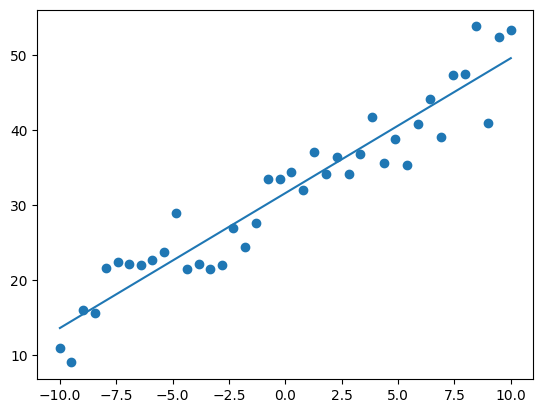

In [ ]:
pred = ds_linear_model(x,*params)
plt.scatter(x,y)
plt.plot(x, pred.detach().numpy())
plt.show()

# torch.nn.Linear 모듈을 이용하기.

* `nn.Linear` 는 내부적으로 `y = x @ weight.T + bias` 형태의 연산을 수행.
* `.view(-1,1)`은 PyTorch 에서 `(N, 1)` 형태의 입력을 기대하기 때문임.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 데이터 준비 (x, y는 이미 float tensor 형태로 되어 있다고 가정)
x = x.view(-1, 1)  # (40,) → (40, 1)
y = y.view(-1, 1)  # (40,) → (40, 1)

# 2. 모델 정의
model = nn.Linear(in_features=1, out_features=1)

# 3. 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

# 4. 학습 루프
n_epoch = 5000
for epoch in range(n_epoch):
    optimizer.zero_grad()

    pred = model(x)
    loss = criterion(pred, y)

    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 1142.5562
Epoch 1000: Loss = 30.5690
Epoch 2000: Loss = 11.8387
Epoch 3000: Loss = 11.4970
Epoch 4000: Loss = 11.4907


최종 손실 (Final Loss): 11.4906
학습된 파라미터:
가중치 w: 1.7981
편향 b: 31.6402


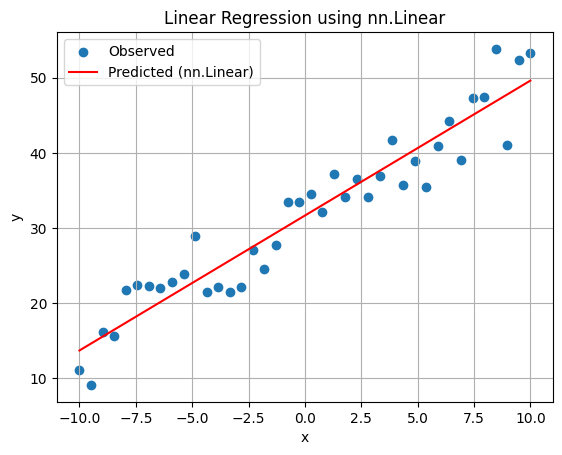

In [ ]:
# 예측값 계산 (그래디언트 추적 중지)
with torch.no_grad():
    pred = model(x)

# 손실 출력
final_loss = criterion(pred, y)
print(f"최종 손실 (Final Loss): {final_loss.item():.4f}")

# 학습된 파라미터 출력
print("학습된 파라미터:")
print(f"가중치 w: {model.weight.item():.4f}")
print(f"편향 b: {model.bias.item():.4f}")

# 시각화
plt.scatter(x.numpy(), y.numpy(), label='Observed')
plt.plot(x.numpy(), pred.numpy(), color='red', label='Predicted (nn.Linear)')
plt.legend()
plt.title("Linear Regression using nn.Linear")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()